# Packages, Libararies, Loading Dataset and Functions

In [ ]:
# Import the necessary modules
from google.colab import drive
import os
import pickle
import numpy as np
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from matplotlib import pyplot

In [1]:
# Connect to Google Drive
drive.mount('/content/drive')

# Direct to the correct directory
os.chdir("drive/My Drive/SEPSIS")

# Check the files
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Load the test set

with open("X_test.txt", "rb") as fp:   # Unpickling
  X_test = pickle.load(fp)

with open("y_test.txt", "rb") as fp:   # Unpickling
  y_test = pickle.load(fp)

# Transform the labels so that they have same shape
y = y_test
y1 = y.transpose(2,0,1).reshape(-1,2)
y = np.argmax(y1, axis=1) 

1107
1107


### Functions

In [138]:
# This functions changes the shape of the model.predict(X_test) output, so that it has the same
# shape as the y_test labels, which is necessary so that these two variables can be compared

def process_single_models(y_predict):
  y_predict_new = y_predict.transpose(2,0,1).reshape(-1,2)
  y_predict_new=np.argmax(y_predict_new, axis=1) 

  return y_predict_new

In [112]:
# This functions generates the confusion matrices, the classifications reports 
# and the AUC score of each model

def evaluation_metrics(y_true, y_predict):

  print("Confusion Matrix: \n",confusion_matrix(y_true, y_predict),"\n")
  print("Classification Report: \n",classification_report(y_true, y_predict, digits=5))
  print("AUC score: ", roc_auc_score(y, y_predict))


In [139]:
# Compute the macro average recall, precision and F1 manually to check the values
# Computed using the confusion matrix values
# Two different functions, as the ensemble models need a slightly different argument

def manual_metrics(y_true, y_predict):
  test = confusion_matrix(y_true, process_single_models(y_predict))
  average_recall = ((test[0][0] / (test[0][0] + test[1][0])) + (test[1][1] / (test[1][1] + test[0][1])) ) / 2
  average_precision = ((test[0][0] / (test[0][0] + test[0][1])) + (test[1][1] / (test[1][1] + test[1][0])) ) / 2
  average_f1 = (2*(average_recall * average_precision ) / (average_recall + average_precision))
  print("\nManual scores")
  print("Macro Average Recall: ", average_recall)
  print("Macro Average Precision: ", average_precision)
  print("Macro Average F1: ", average_f1)

def manual_metrics_ensemble(y_true, y_predict):
  test = confusion_matrix(y_true, y_predict)
  average_recall = ((test[0][0] / (test[0][0] + test[1][0])) + (test[1][1] / (test[1][1] + test[0][1])) ) / 2
  average_precision = ((test[0][0] / (test[0][0] + test[0][1])) + (test[1][1] / (test[1][1] + test[1][0])) ) / 2
  average_f1 = (2*(average_recall * average_precision ) / (average_recall + average_precision))
  print("\nManual scores")
  print("Macro Average Recall: ", average_recall)
  print("Macro Average Precision: ", average_precision)
  print("Macro Average F1: ", average_f1)

# Loading Models and Predicting using dataset

In [6]:
# Load all the weights of the models

model_gru_1 = load_model('#1_GRU_Model.h5', compile=False)
model_gru_2 = load_model('#2_GRU_Model.h5', compile=False)
model_gru_3 = load_model('#3_GRU_Model.h5', compile=False)
model_gru_4 = load_model('#4_GRU_Model.h5', compile=False)
model_gru_5 = load_model('#5_GRU_Model.h5', compile=False)
model_gru_6 = load_model('#6_GRU_Model.h5', compile=False)

model_lstm_1 = load_model('#1_LSTM_Model.h5', compile=False)
model_lstm_2 = load_model('#2_LSTM_Model.h5', compile=False)
model_lstm_3 = load_model('#3_LSTM_Model.h5', compile=False)
model_lstm_4 = load_model('#4_LSTM_Model.h5', compile=False)
model_lstm_5 = load_model('#5_LSTM_Model.h5', compile=False)
model_lstm_6 = load_model('#6_LSTM_Model.h5', compile=False)


In [8]:
# Save the prediction probabilities for each model

pred_gru_1 = model_gru_1.predict(X_test)
pred_gru_2 = model_gru_2.predict(X_test)
pred_gru_3 = model_gru_3.predict(X_test)
pred_gru_4 = model_gru_4.predict(X_test)
pred_gru_5 = model_gru_5.predict(X_test)
pred_gru_6 = model_gru_6.predict(X_test)

pred_lstm_1 = model_lstm_1.predict(X_test)
pred_lstm_2 = model_lstm_2.predict(X_test)
pred_lstm_3 = model_lstm_3.predict(X_test)
pred_lstm_4 = model_lstm_4.predict(X_test)
pred_lstm_5 = model_lstm_5.predict(X_test)
pred_lstm_6 = model_lstm_6.predict(X_test)


# Evaluating Single Models

### Single GRU models

In [123]:
# Evaluations from #1_GRU_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_gru_1))

manual_metrics(y, pred_gru_1)

Confusion Matrix: 
 [[350356  21397]
 [   139     60]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99960   0.94244   0.97018    371753
           1    0.00280   0.30151   0.00554       199

    accuracy                        0.94210    371952
   macro avg    0.50120   0.62198   0.48786    371952
weighted avg    0.99907   0.94210   0.96967    371952

AUC score:  0.6219752519257294

Manual scores
Macro Average Recall:  0.501199854139005
Macro Average Precision:  0.6219752519257296
Macro Average F1:  0.5550940434131731


In [124]:
# Evaluations from #2_GRU_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_gru_2))

manual_metrics(y, pred_gru_2)

Confusion Matrix: 
 [[350345  21408]
 [   150     49]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99957   0.94241   0.97015    371753
           1    0.00228   0.24623   0.00453       199

    accuracy                        0.94204    371952
   macro avg    0.50093   0.59432   0.48734    371952
weighted avg    0.99904   0.94204   0.96963    371952

AUC score:  0.5943222662013102

Manual scores
Macro Average Recall:  0.5009278354396914
Macro Average Precision:  0.5943222662013102
Macro Average F1:  0.543643074610584


In [125]:
# Evaluations from #3_GRU_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_gru_3))

manual_metrics(y, pred_gru_3)

Confusion Matrix: 
 [[350342  21411]
 [   154     45]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99956   0.94241   0.97014    371753
           1    0.00210   0.22613   0.00416       199

    accuracy                        0.94202    371952
   macro avg    0.50083   0.58427   0.48715    371952
weighted avg    0.99903   0.94202   0.96963    371952

AUC score:  0.5842679800078527

Manual scores
Macro Average Recall:  0.50082896904835
Macro Average Precision:  0.5842679800078528
Macro Average F1:  0.5393404346585047


In [126]:
# Evaluations from #4_GRU_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_gru_4))

manual_metrics(y, pred_gru_4)

Confusion Matrix: 
 [[350343  21410]
 [   152     47]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99957   0.94241   0.97015    371753
           1    0.00219   0.23618   0.00434       199

    accuracy                        0.94203    371952
   macro avg    0.50088   0.58929   0.48724    371952
weighted avg    0.99903   0.94203   0.96963    371952

AUC score:  0.5892944506150523

Manual scores
Macro Average Recall:  0.5008783774943616
Macro Average Precision:  0.5892944506150521
Macro Average F1:  0.5415010183337181


In [127]:
# Evaluations from #5_GRU_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_gru_5))

manual_metrics(y, pred_gru_5)

Confusion Matrix: 
 [[350350  21403]
 [   145     54]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99959   0.94243   0.97017    371753
           1    0.00252   0.27136   0.00499       199

    accuracy                        0.94207    371952
   macro avg    0.50105   0.60689   0.48758    371952
weighted avg    0.99905   0.94207   0.96965    371952

AUC score:  0.6068918051669554

Manual scores
Macro Average Recall:  0.5010514803030158
Macro Average Precision:  0.6068918051669554
Macro Average F1:  0.5489162511304629


In [128]:
# Evaluations from #6_GRU_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_gru_6))

manual_metrics(y, pred_gru_6)

Confusion Matrix: 
 [[350343  21410]
 [   152     47]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99957   0.94241   0.97015    371753
           1    0.00219   0.23618   0.00434       199

    accuracy                        0.94203    371952
   macro avg    0.50088   0.58929   0.48724    371952
weighted avg    0.99903   0.94203   0.96963    371952

AUC score:  0.5892944506150523

Manual scores
Macro Average Recall:  0.5008783774943616
Macro Average Precision:  0.5892944506150521
Macro Average F1:  0.5415010183337181


### Single LSTM models

In [129]:
# Evaluations from #1_LSTM_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_lstm_1))

manual_metrics(y, pred_lstm_1)

Confusion Matrix: 
 [[350350  21403]
 [   145     54]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99959   0.94243   0.97017    371753
           1    0.00252   0.27136   0.00499       199

    accuracy                        0.94207    371952
   macro avg    0.50105   0.60689   0.48758    371952
weighted avg    0.99905   0.94207   0.96965    371952

AUC score:  0.6068918051669554

Manual scores
Macro Average Recall:  0.5010514803030158
Macro Average Precision:  0.6068918051669554
Macro Average F1:  0.5489162511304629


In [130]:
# Evaluations from #2_LSTM_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_lstm_2))

manual_metrics(y, pred_lstm_2)

Confusion Matrix: 
 [[350348  21405]
 [   147     52]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99958   0.94242   0.97016    371753
           1    0.00242   0.26131   0.00480       199

    accuracy                        0.94206    371952
   macro avg    0.50100   0.60186   0.48748    371952
weighted avg    0.99905   0.94206   0.96964    371952

AUC score:  0.6018639895806973

Manual scores
Macro Average Recall:  0.501002022357686
Macro Average Precision:  0.6018639895806973
Macro Average F1:  0.5468208698066964


In [131]:
# Evaluations from #3_LSTM_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_lstm_3))

manual_metrics(y, pred_lstm_3)

Confusion Matrix: 
 [[350350  21403]
 [   145     54]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99959   0.94243   0.97017    371753
           1    0.00252   0.27136   0.00499       199

    accuracy                        0.94207    371952
   macro avg    0.50105   0.60689   0.48758    371952
weighted avg    0.99905   0.94207   0.96965    371952

AUC score:  0.6068918051669554

Manual scores
Macro Average Recall:  0.5010514803030158
Macro Average Precision:  0.6068918051669554
Macro Average F1:  0.5489162511304629


In [132]:
# Evaluations from #4_LSTM_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_lstm_4))

manual_metrics(y, pred_lstm_4)

Confusion Matrix: 
 [[350350  21403]
 [   145     54]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99959   0.94243   0.97017    371753
           1    0.00252   0.27136   0.00499       199

    accuracy                        0.94207    371952
   macro avg    0.50105   0.60689   0.48758    371952
weighted avg    0.99905   0.94207   0.96965    371952

AUC score:  0.6068918051669554

Manual scores
Macro Average Recall:  0.5010514803030158
Macro Average Precision:  0.6068918051669554
Macro Average F1:  0.5489162511304629


In [133]:
# Evaluations from #5_LSTM_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_lstm_5))

manual_metrics(y, pred_lstm_5)

Confusion Matrix: 
 [[350344  21409]
 [   151     48]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99957   0.94241   0.97015    371753
           1    0.00224   0.24121   0.00443       199

    accuracy                        0.94204    371952
   macro avg    0.50090   0.59181   0.48729    371952
weighted avg    0.99904   0.94204   0.96963    371952

AUC score:  0.5918083584081811

Manual scores
Macro Average Recall:  0.5009031064670265
Macro Average Precision:  0.5918083584081811
Macro Average F1:  0.5425744209495668


In [134]:
# Evaluations from #6_LSTM_Model.h5 using the metrics() and manual_metrics() function

evaluation_metrics(y, process_single_models(pred_lstm_6))

manual_metrics(y, pred_lstm_6)

Confusion Matrix: 
 [[350340  21413]
 [   155     44]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99956   0.94240   0.97014    371753
           1    0.00205   0.22111   0.00406       199

    accuracy                        0.94201    371952
   macro avg    0.50080   0.58175   0.48710    371952
weighted avg    0.99902   0.94201   0.96962    371952

AUC score:  0.5817527272356651

Manual scores
Macro Average Recall:  0.500804190576367
Macro Average Precision:  0.5817527272356651
Macro Average F1:  0.5382519826628429


# Evaluating Ensembles Models

### Ensemble of GRU models

In [140]:
# Metrics for ensemble of GRU models
# First the prediction probabilities are averaged by summing up the probabilities and dividing by 6
# Then convert final_gru_pred variable in the right shape just as the labels (y_true)
# Generate the confusion matrix, classification report and AUC value

final_gru_pred = (pred_gru_1 + pred_gru_2 + pred_gru_3 + pred_gru_4 + pred_gru_5 + pred_gru_6) / 6

final_gru_pred1 = final_gru_pred.transpose(2,0,1).reshape(-1,2)
final_gru_pred = np.argmax(final_gru_pred1, axis=1) 

evaluation_metrics(y, final_gru_pred)

manual_metrics_ensemble(y, final_gru_pred)

Confusion Matrix: 
 [[350345  21408]
 [   150     49]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99957   0.94241   0.97015    371753
           1    0.00228   0.24623   0.00453       199

    accuracy                        0.94204    371952
   macro avg    0.50093   0.59432   0.48734    371952
weighted avg    0.99904   0.94204   0.96963    371952

AUC score:  0.5943222662013102

Manual scores
Macro Average Recall:  0.5009278354396914
Macro Average Precision:  0.5943222662013102
Macro Average F1:  0.543643074610584


### Ensemble of LSTM models (baseline)

In [141]:
# Metrics for ensemble of LSTM models
# First the prediction probabilities are averaged by summing up the probabilities and dividing by 6
# Then convert final_lstm_pred variable in the right shape just as the labels (y_true)
# Generate the confusion matrix, classification report and AUC value

final_lstm_pred = (pred_lstm_1 + pred_lstm_2 + pred_lstm_3 + pred_lstm_4 + pred_lstm_5 + pred_lstm_6) / 6

final_lstm_pred1 = final_lstm_pred.transpose(2,0,1).reshape(-1,2)
final_lstm_pred = np.argmax(final_lstm_pred1, axis=1) 

evaluation_metrics(y, final_lstm_pred)

manual_metrics_ensemble(y, final_lstm_pred)

Confusion Matrix: 
 [[350348  21405]
 [   147     52]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99958   0.94242   0.97016    371753
           1    0.00242   0.26131   0.00480       199

    accuracy                        0.94206    371952
   macro avg    0.50100   0.60186   0.48748    371952
weighted avg    0.99905   0.94206   0.96964    371952

AUC score:  0.6018639895806973

Manual scores
Macro Average Recall:  0.501002022357686
Macro Average Precision:  0.6018639895806973
Macro Average F1:  0.5468208698066964


### Ensemble of GRU and LSTM models

In [142]:
# Metrics for ensemble of GRU and LSTM models
# First the prediction probabilities are averaged by summing up the probabilities and dividing by 6
# Then convert final_pred variable in the right shape just as the labels (y_true)
# Generate the confusion matrix, classification report and AUC value

final_pred = (pred_gru_1 + pred_gru_2 + pred_gru_5 + pred_lstm_1 + pred_lstm_3 + pred_lstm_4) / 6

final_pred1 = final_pred.transpose(2,0,1).reshape(-1,2)
final_pred = np.argmax(final_pred1, axis=1) 

evaluation_metrics(y, final_pred)

manual_metrics_ensemble(y, final_pred)

Confusion Matrix: 
 [[350349  21404]
 [   146     53]] 

Classification Report: 
               precision    recall  f1-score   support

           0    0.99958   0.94242   0.97016    371753
           1    0.00247   0.26633   0.00489       199

    accuracy                        0.94206    371952
   macro avg    0.50103   0.60438   0.48753    371952
weighted avg    0.99905   0.94206   0.96965    371952

AUC score:  0.6043778973738263

Manual scores
Macro Average Recall:  0.5010267513303509
Macro Average Precision:  0.6043778973738263
Macro Average F1:  0.5478708540841549


# ROC Curve Graph

In [143]:
# Compute al the false positive and true positves rates of each model implementation
# Using the roc_auc_score from the sklearn library

fpr_gru, tpr_gru, thresholds = metrics.roc_curve(y, process_single_models(pred_gru_1), pos_label=1)
fpr_lstm, tpr_lstm, thresholds = metrics.roc_curve(y, process_single_models(pred_lstm_1), pos_label=1)
fpr_e_gru, tpr_e_gru, thresholds = metrics.roc_curve(y, final_gru_pred, pos_label=1)
fpr_e_lstm, tpr_e_lstm, thresholds = metrics.roc_curve(y, final_lstm_pred, pos_label=1)
fpr_e_gru_lstm, tpr_e_gru_lstm, thresholds = metrics.roc_curve(y, final_pred, pos_label=1)

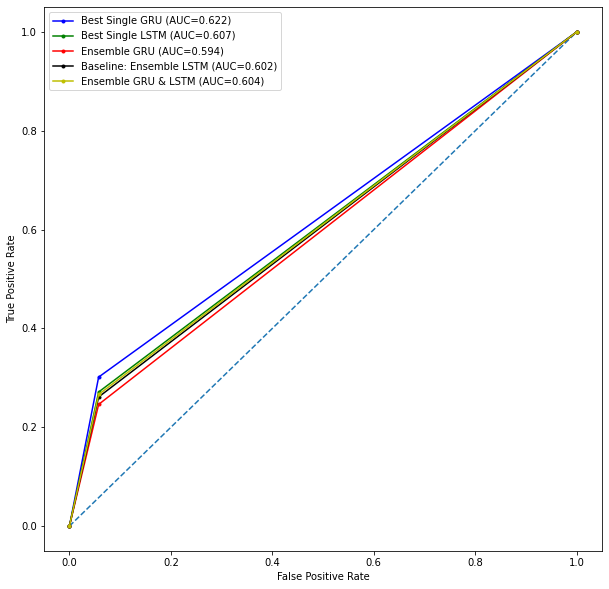

In [144]:
# Using matplotlib to plot all the AUROC curve of each implementation
# Also showing the AUC scores of each implementation

pyplot.figure(figsize=(10,10))
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr_gru, tpr_gru, marker='.',color='B', label='Best Single GRU (AUC=0.622)') 
pyplot.plot(fpr_lstm, tpr_lstm, marker='.',color='G', label='Best Single LSTM (AUC=0.607)') 
pyplot.plot(fpr_e_gru, tpr_e_gru,  marker='.',color='R', label='Ensemble GRU (AUC=0.594)') 
pyplot.plot(fpr_e_lstm, tpr_e_lstm, marker='.',color='K', label='Baseline: Ensemble LSTM (AUC=0.602)') 
pyplot.plot(fpr_e_gru_lstm, tpr_e_gru_lstm, marker='.',color='Y', label='Ensemble GRU & LSTM (AUC=0.604)') 
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()